In [1]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
image_dir = "../ODIR-5K/ODIR-5K/Training Images"
image_path = os.path.join(image_dir, '17_left.jpg')
img = cv2.imread(image_path)

In [ ]:
# Region
row_min = img.shape[0]//3
row_max = row_min*2

img_center_row = img[row_min:row_max,:,:]
img_center_row.shape

col_center = img.shape[1]//2
img_left = img_center_row[:,:col_center,:]
img_right = img_center_row[:,col_center:,:]

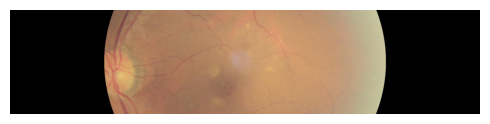

In [16]:
plt.figure(figsize=(5,5))
plt.imshow(img_center_row[:,:,::-1])
plt.axis('off')
plt.tight_layout()
plt.show()

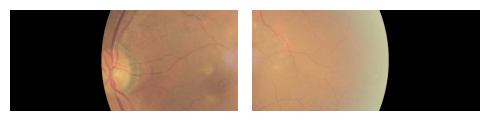

In [18]:
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.imshow(img_left[:,:,::-1])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_right[:,:,::-1])
plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
# Param
# mean
print(img.mean())
print(img[:,:,0].mean())
print(img[:,:,1].mean())
print(img[:,:,2].mean())

60.023004811814126
46.68810527227652
59.121592747985254
74.2593164151806


In [55]:
image_dir = "/home/mapardo/KeepCoding/finalProject/RD/IDRiD/C. Localization/1. Original Images/a. Training Set"
lst_images = os.listdir(image_dir)

left_mean = []
left_mean_0 = []
left_mean_1 = []
left_mean_2 = []
right_mean = []
right_mean_0 = []
right_mean_1 = []
right_mean_2 = []
width = []
for image in lst_images:
    image_path = os.path.join(image_dir, image)
    img = cv2.imread(image_path)
    
    # Region
    row_min = img.shape[0]//3
    row_max = row_min*2

    img_center_row = img[row_min:row_max,:,:]
    img_center_row.shape

    col_center = img.shape[1]//2
    img_left = img_center_row[:,:col_center,:]
    img_right = img_center_row[:,col_center:,:]
    
    # Parameters    
    width.append(img.shape[1])
    left_mean.append(img_left.mean())
    left_mean_0.append(img_left[:,:,0].mean())
    left_mean_1.append(img_left[:,:,1].mean())
    left_mean_2.append(img_left[:,:,2].mean())
    right_mean.append(img_right.mean())
    right_mean_0.append(img_right[:,:,0].mean())
    right_mean_1.append(img_right[:,:,1].mean())
    right_mean_2.append(img_right[:,:,2].mean())

lst_fundus = map(lambda x: x.replace('.jpg',''), lst_images)
df_params = pd.DataFrame({'fundus': lst_fundus, 'width': width, 'left_mean': left_mean, 'left_mean_0': left_mean_0, 
             'left_mean_1': left_mean_1, 'left_mean_2': left_mean_2,
             'right_mean': right_mean, 'right_mean_0': right_mean_0, 
             'right_mean_1': right_mean_1, 'right_mean_2': right_mean_2})

df_params

,fundus,width,left_mean,left_mean_0,left_mean_1,left_mean_2,right_mean,right_mean_0,right_mean_1,right_mean_2
0,IDRiD_343,4288,71.344258,13.529273,59.787571,140.715929,48.635731,8.739387,40.699928,96.467880
1,IDRiD_108,4288,90.985743,22.045467,84.315690,166.596073,62.626837,11.225743,55.209385,121.445382
2,IDRiD_048,4288,82.483273,39.635498,75.006156,132.808166,57.696323,27.008840,51.409329,94.670800
3,IDRiD_154,4288,57.341738,1.105454,42.865763,128.053996,38.818495,0.959971,28.444766,87.050749
4,IDRiD_011,4288,77.355466,4.111626,70.574743,157.380028,48.298683,2.078042,40.281420,102.536588
...,...,...,...,...,...,...,...,...,...,...
408,IDRiD_207,4288,83.022871,14.203388,77.147564,157.717660,91.077522,23.342221,91.039762,158.850585
409,IDRiD_370,4288,70.370147,13.942697,60.797624,136.370121,70.920235,16.688038,64.113249,131.959417
410,IDRiD_344,4288,77.617760,14.013013,73.534709,145.305560,84.881807,21.219000,83.252375,150.174045
411,IDRiD_366,4288,55.657443,1.067904,42.216549,123.687877,40.284545,0.895649,28.120124,91.837863


In [56]:
# TODO Read OD IDRiD
# TODO Read images IDRiD
groundtruths_dir = "/home/mapardo/KeepCoding/finalProject/RD/IDRiD/C. Localization/2. Groundtruths/1. Optic Disc Center Location"
groundtruths_file = "a. IDRiD_OD_Center_Training Set_Markups.csv"
df_gt = pd.read_csv(os.path.join(groundtruths_dir,groundtruths_file))
df_gt = df_gt[['Image No', 'X- Coordinate', 'Y - Coordinate']]
df_gt.columns = ['fundus', 'x', 'y']
df_gt.head()

,fundus,x,y
0,IDRiD_001,2858.0,1805.0
1,IDRiD_002,943.0,1119.0
2,IDRiD_003,779.0,1269.0
3,IDRiD_004,1292.0,1284.0
4,IDRiD_005,1037.0,1198.0


In [57]:
df = pd.merge(df_params, df_gt, on='fundus')
df.head()

,fundus,width,left_mean,left_mean_0,left_mean_1,left_mean_2,right_mean,right_mean_0,right_mean_1,right_mean_2,x,y
0,IDRiD_343,4288,71.344258,13.529273,59.787571,140.715929,48.635731,8.739387,40.699928,96.467880,606.0,1145.0
1,IDRiD_108,4288,90.985743,22.045467,84.315690,166.596073,62.626837,11.225743,55.209385,121.445382,1003.0,1430.0
2,IDRiD_048,4288,82.483273,39.635498,75.006156,132.808166,57.696323,27.008840,51.409329,94.670800,884.0,1205.0
3,IDRiD_154,4288,57.341738,1.105454,42.865763,128.053996,38.818495,0.959971,28.444766,87.050749,745.0,1490.0
4,IDRiD_011,4288,77.355466,4.111626,70.574743,157.380028,48.298683,2.078042,40.281420,102.536588,1063.0,1329.0


In [65]:
# classify fundus using width and x
df['position'] = 0
df.loc[df['x'] > df['width']//2, 'position'] = 1
df.head()


,fundus,width,left_mean,left_mean_0,left_mean_1,left_mean_2,right_mean,right_mean_0,right_mean_1,right_mean_2,x,y,position
0,IDRiD_343,4288,71.344258,13.529273,59.787571,140.715929,48.635731,8.739387,40.699928,96.467880,606.0,1145.0,0
1,IDRiD_108,4288,90.985743,22.045467,84.315690,166.596073,62.626837,11.225743,55.209385,121.445382,1003.0,1430.0,0
2,IDRiD_048,4288,82.483273,39.635498,75.006156,132.808166,57.696323,27.008840,51.409329,94.670800,884.0,1205.0,0
3,IDRiD_154,4288,57.341738,1.105454,42.865763,128.053996,38.818495,0.959971,28.444766,87.050749,745.0,1490.0,0
4,IDRiD_011,4288,77.355466,4.111626,70.574743,157.380028,48.298683,2.078042,40.281420,102.536588,1063.0,1329.0,0


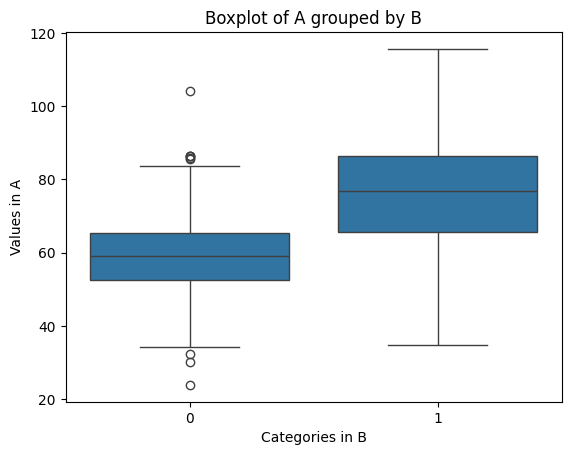

In [71]:
# boxplot for each parameters 0 vs 1

# Create the boxplot
sns.boxplot(x='position', y='right_mean', data=df)

# Add titles and labels
plt.title('Boxplot of A grouped by B')
plt.xlabel('Categories in B')
plt.ylabel('Values in A')
plt.show()